# Problem Description

- In modern High Volume Manufacturing (HVM) facility, Statistical Process Control (SPC) systems are very important to ensure all the equipment are delivering products that meet customer specifications. <br>
- For example, in a robotic car assembly facility, the customer specification could be that an average car engine should deliver 22.5miles per gallon (mpg) of fuel. This is the 'response' variable. <br>
- However, no process in nature will always be on target 100% of the time. Instead, there would be normal variation causing some engines to deliver higher and some to deliver lower than 22.5mpg. <br>
- The customer understands about normal variation and is OK to tolerate a variation of +/- 1.5mpg. Any engine beyond these tolerance limits cannot be sold to the customer and needs to be scraped or sold for spare parts causing a revenue loss to the company. <br>
- Hence our response variable has a target of 22.5mpg, an upper control limit of 24mpg and a lower control limit (LCL) of 21mpg. 
- The upper management of the company want 100% of the engines produced to meet these specifications (specs). However, again in nature, nothing is 100% certain. Instead, as Engineers and Statisticians, we settle for the next best thing: We can use SPC systems and 6-sigma processes to ensure 99.73% of engines will be within the specs

- Typical HVM product lines can take anywhere between a week to few months to go from pure raw material to the complete finished product that can be sold to the customer.
- Since the 'response' variables are customer specs, they can only be tested at the end of the manufacturing product line when the product is already built and ready to ship to the customer
- The problem here is that if one of the equipment early on in the manufacturing line has gone rougue and produces defective parts, it can only be detected after several weeks or months when these products are finally tested for the 'response'
- This implies that by the time the issue is identified, there could be a huge volume of products that have been processed in the rougue equipment and cause a large revenue impact to the company. So obviously, this strategy is super risky.
- To prevent huge revenue losses from random rougue equipment, HVM facilities continuously measure critical dimensions on the product at various steps in the manufacturing line. 
- These critical dimensions are fed into a SPC system that tracks whether the measurements are running within acceptable tolerance limits themselves following 6-sigma processes.

- Now consider the following problem statement: All the critical dimensions are performing within their 6-sigma tolerances but the response variable has a large percentage falling outside the customer specs.
- In this case, it's obvious that some of the critical dimensions need to have their variation tightened to tighten the variation in the response.
- Hence there are 2 questions to be answered:
    1. Considering all the critical dimensions measured on the product, which have the most impact on the resposne's variation and what are their individual contributions?
    2. How much should the variation of these important critical dimensions be tightened to ensure the response's variation meets customer specs?
- Let us attempt to answer both these questions using data science

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import gauss
%matplotlib inline

# Modeling
Considering all the critical dimensions measured on the product, which have the most impact on the resposne's variation and what are their individual contributions?

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:60% !important; }</style>"))

In [3]:
pd.set_option('display.max_columns', 15)

In [4]:
df = pd.read_csv('data/data.csv')
print('Dataset columns = {}, rows = {}'.format(df.shape[0],df.shape[1]))

# Desired control limits
target = 22.5 # Target Value
ucl = 24 # Upper Control Limit
lcl = 21 # Lower Control Limit

df.head()

Dataset columns = 30000, rows = 201


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,response
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.331327
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,21.791539
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.482583
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,21.906473
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.444643


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 201 entries, feature_1 to response
dtypes: float64(201)
memory usage: 46.0 MB


In [6]:
# Split features (X) and response (y)
X = df.iloc[:,:-1]
y = df['response']

# Split Train as first 80% (24K) rows and test as last 20% (6K) rows to simulate using past data to train and future data to test
X_train, X_test, y_train, y_test = X[:24000], X[24000:], y[:24000], y[24000:]

print('X_train, y_train, X_test, y_test shapes = {}, {}, {}, {}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train, y_train, X_test, y_test shapes = (24000, 200), (24000,), (6000, 200), (6000,)


Response Mean: 22.51, StdDev: 0.91
Below LCL(21): 4.92%, Above UCL(24): 5.01%


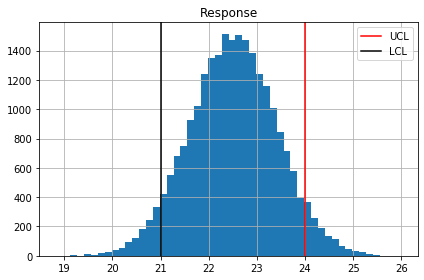

In [7]:
# Print Statistics
pct_below_lcl = y_train [y_train < lcl].count()/len(y_train)
pct_above_ucl = y_train[y_train > ucl].count()/len(y_train)
print('Response Mean: {:.2f}, StdDev: {:.2f}'.format(y_train.mean(), y_train.std()))
print('Below LCL({}): {:.2f}%, Above UCL({}): {:.2f}%'.format(lcl, pct_below_lcl*100, ucl, pct_above_ucl*100))

# Check the distribution of the y_train
y_train.hist(bins=50)
plt.axvline(ucl, color = 'r', label = 'UCL')
plt.axvline(lcl, color = 'k', label = 'LCL')
plt.legend()
plt.title('Response')
plt.tight_layout();

In [8]:
X_train.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200
count,4450.000000,4368.000000,4424.000000,4367.000000,4385.000000,4456.000000,4414.000000,...,4429.000000,4428.000000,4428.000000,4440.000000,4479.000000,4356.000000,8345.000000
mean,-0.049984,-0.030033,99.962276,50.091356,-11.385654,105.867981,-59.339075,...,98.553579,92.706017,-96.988730,131.123582,135.555401,114.764995,147.436303
std,0.002009,0.001987,4.968360,5.060973,5.151478,8.741134,2.710678,...,15.158036,19.149855,21.949254,11.142099,12.009602,6.681187,22.808123
min,-0.056646,-0.037404,82.764507,28.542544,-31.091991,71.391283,-69.758132,...,47.780318,13.544308,-180.415655,93.912896,93.424235,86.533637,70.187863
25%,-0.051322,-0.031377,96.668553,46.644774,-14.884029,100.119169,-61.160649,...,88.415621,80.063579,-111.424782,123.605823,127.156606,110.347601,131.862404
50%,-0.049995,-0.030015,99.901465,50.047881,-11.358976,105.835191,-59.359806,...,98.427256,92.604969,-97.440547,131.151515,135.492407,114.652342,147.404291
75%,-0.048640,-0.028674,103.244163,53.500605,-7.936962,111.622879,-57.462528,...,108.756368,105.530431,-82.573571,138.648872,143.644408,119.144742,162.688959
max,-0.043528,-0.022886,117.084253,70.432492,8.643604,134.397908,-49.525436,...,151.325914,160.912889,-14.354053,170.603790,186.887618,141.026975,235.200831


In [9]:
# Check % of missing data
mean_missing = X_train.isna().sum().mean()/X_train.shape[0]
min_missing = X_train.isna().sum().min()/X_train.shape[0]
max_missing = X_train.isna().sum().max()/X_train.shape[0]
print ('Mean missing = {:.2f}%; Min missing = {:.2f}% ; Max missing = {:.2f}% '.format(mean_missing*100, min_missing*100, max_missing*100))

Mean missing = 81.39%; Min missing = 65.23% ; Max missing = 81.98% 


Since the model's output needs to be interpretable for the Engineering team to take action on the important features, we choose to use Linear Models here

In [10]:
# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Linear model
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV, Lasso
alphas = np.logspace(-6, -0.1, 100)
lr_model = LinearRegression()
lass_model = LassoCV(alphas=alphas, cv=3, max_iter=10000)
rid_model = RidgeCV(alphas=alphas, cv=3)
elas_model = ElasticNetCV(alphas=alphas, cv=3, max_iter=10000, l1_ratio=0.5)

# Cross Validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

# Pipeline
from sklearn.pipeline import Pipeline

# Metrics
from sklearn.metrics import mean_squared_error, r2_score

models = {'linear_regression': lr_model, 'lasso': lass_model, 'ridge': rid_model, 'elastic_net': elas_model}

In [11]:
alpha_all, RMSE_all, R2_all = [], [], []
for model, estimator in models.items():
    model_pipeline = Pipeline([
        ('imputer', imputer), 
        ('scaling', scaler),
        (model, estimator)
        ])
    
    alpha, RMSE, R2 = [], [], []
    
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.loc[train_index], X_train.loc[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
        model_pipeline.fit(X_train_fold, y_train_fold)
        
        if hasattr(model_pipeline.named_steps[model], 'alpha_'):
            alpha.append(model_pipeline.named_steps[model].alpha_)
        else:
            alpha.append(0)
        
        y_pred = model_pipeline.predict(X_val_fold)
        RMSE.append(mean_squared_error(y_val_fold, y_pred)**0.5)
        R2.append(r2_score(y_val_fold, y_pred))
        
    alpha_all.append(np.mean(alpha))
    RMSE_all.append(np.mean(RMSE))
    R2_all.append(np.mean(R2))

    print('{} Alpha mean: {:.4f}; stddev: {:.4f}'.format(model, np.mean(alpha), np.std(alpha)))
    print('{} RMSE mean: {:.4f}; stddev: {:.4f}'.format(model, np.mean(RMSE), np.std(RMSE)))
    print('{} R2 mean: {:.4f}; stddev: {:.4f}\n'.format(model, np.mean(R2), np.std(R2)))

linear_regression Alpha mean: 0.0000; stddev: 0.0000
linear_regression RMSE mean: 0.8222; stddev: 0.0137
linear_regression R2 mean: 0.1788; stddev: 0.0182

lasso Alpha mean: 0.0092; stddev: 0.0006
lasso RMSE mean: 0.8199; stddev: 0.0137
lasso R2 mean: 0.1834; stddev: 0.0176

ridge Alpha mean: 0.7943; stddev: 0.0000
ridge RMSE mean: 0.8222; stddev: 0.0137
ridge R2 mean: 0.1788; stddev: 0.0182

elastic_net Alpha mean: 0.0171; stddev: 0.0011
elastic_net RMSE mean: 0.8199; stddev: 0.0136
elastic_net R2 mean: 0.1833; stddev: 0.0175



In [12]:
model_metrics_df = pd.DataFrame(np.c_[alpha_all, RMSE_all, R2_all], 
                                columns=['alpha', 'RMSE', 'R2'], 
                                index=['Linear_Reg', 'Lasso', 'Ridge', 'Elastic_Net'])
model_metrics_df

,alpha,RMSE,R2
Linear_Reg,0.000000,0.822168,0.178774
Lasso,0.009208,0.819857,0.183395
Ridge,0.794328,0.822168,0.178775
Elastic_Net,0.017066,0.819918,0.183274


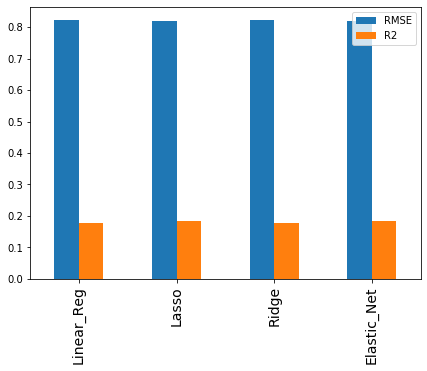

In [13]:
model_metrics_df.plot.bar(y=['RMSE', 'R2'], figsize=(7,5))
plt.xticks(fontsize=14, rotation=90);

The RMSEs are not great. In fact, the RMSEs are only ~0.1 lower than the std dev of the response. Let's dig deeper

RMSE: 0.8238
R2: 0.1936


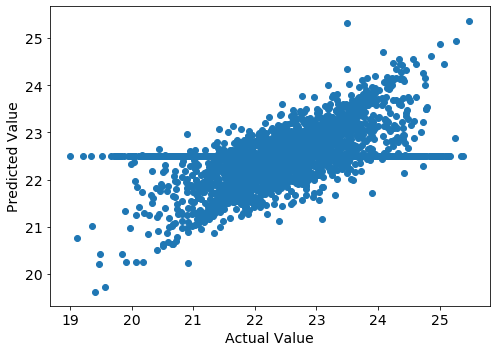

In [14]:
# Build individual Lasso model with best Alpha from above
final_pipeline = Pipeline([
        ('imputer', imputer), 
        ('scaling', scaler),
        ('lasso', Lasso(alpha = model_metrics_df.alpha['Lasso']))
        ])

final_pipeline.fit(X_train, y_train)

y_pred = final_pipeline.predict(X_test)
print('RMSE: {:.4f}'.format(mean_squared_error(y_test, y_pred)**0.5))
print('R2: {:.4f}'.format(r2_score(y_test, y_pred)))

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);
plt.ylabel('Predicted Value', fontsize=14)
plt.xlabel('Actual Value', fontsize=14)
plt.tight_layout();

In [15]:
# Find out which features Lasso uses to build the model
coef = pd.DataFrame(final_pipeline.named_steps['lasso'].coef_, columns=['coefficient'], index=X_train.columns)
coef[coef['coefficient'] != 0]

,coefficient
feature_1,0.208161
feature_2,-0.205612
feature_3,-0.206923
feature_4,0.093538
feature_61,-0.000593


In [16]:
# Rescale back the coefficients to the original scale
# https://stackoverflow.com/questions/31029340/how-to-adjust-scaled-scikit-learn-logicistic-regression-coeffs-to-score-a-non-sc
coef_rescale = coef.divide(scaler.scale_, axis=0 )
coef_rescale[coef_rescale['coefficient'] != 0]

,coefficient
feature_1,240.664873
feature_2,-242.632047
feature_3,-0.097016
feature_4,0.043333
feature_61,-0.000341


In [17]:
# Drop rows that contain missing values in the features used by the Lasso model to prevent noise from Imputation
feature_cols = list(coef_rescale[coef_rescale['coefficient'] != 0].index)
test_df = X_test.dropna(axis = 0, how='any', subset=feature_cols)
y_test = y_test[test_df.index]
test_df.shape

(227, 200)

RMSE: 0.1098
R2: 0.9861


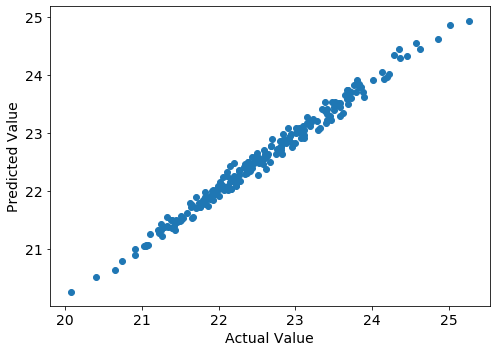

In [18]:
y_pred = final_pipeline.predict(test_df)
print('RMSE: {:.4f}'.format(mean_squared_error(y_test, y_pred)**0.5))
print('R2: {:.4f}'.format(r2_score(y_test, y_pred)))

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);
plt.ylabel('Predicted Value', fontsize=14)
plt.xlabel('Actual Value', fontsize=14)
plt.tight_layout();

We achieved much better RMSE and R2 after removing the missing values from the features that are important to the model! <br>
This suggests that while making predictions, we must limit ourselves to predicting only those rows that have data for all the 5 important features. <br>
As a Data Scientist, we can use this conclusion to influence the Engineering team who is incharge of choosing how to sample the measurments. <br> 
For example, since each feature is measured on 20% of the rows, the Engineering team could implement a sampling strategy to ensure half of these measurements (10%) are measured on all 5 features and the other half (10%) remains random. <br>
Knowing your customer and using data to influence their decisions are important skills for a Data Scientist!

# Monte Carlo Simulation
How much should the variation of these important critical dimensions be tightened to ensure the response's variation meets customer specs?

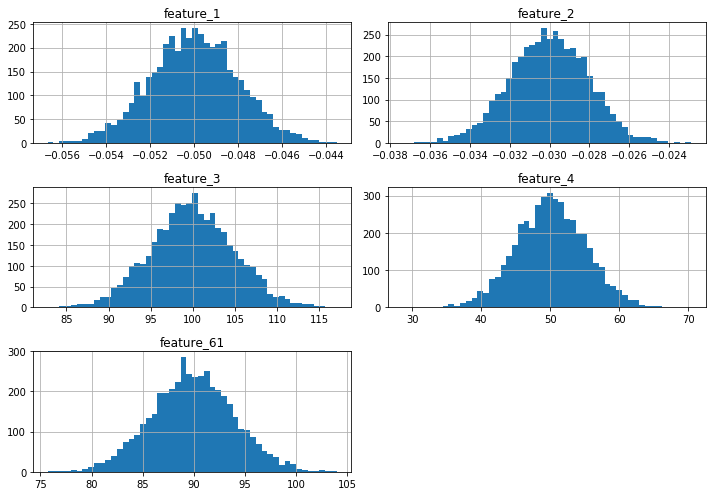

In [19]:
# View the distribution of the feature columns
X_train[feature_cols].hist(figsize=(10,7), bins=50)
plt.tight_layout();

In [20]:
# Develop the Montel-Carlo simulation model of the response by choosing random normally distributed values for the important features
N_runs = 50000
RMSE = mean_squared_error(y_test, y_pred)**0.5

def sim_response_gen(X_train, y_train, feature_cols, coef_rescale, RMSE, N_runs, std_div=1):
    '''Simulate Response generator
    Since Lasso is a linear model, we construct the reponse = coef1*feature1 + coef2*feature2 + ...
    All the features to generate normally distributed N_runs number of random points using the mean and stddev of their actual data
    '''
    
    simulated_response = 0
    for col in feature_cols:
        col_mean = X_train[col].mean()
        col_std = X_train[col].std()/std_div
        col_coef = coef_rescale.coefficient[col]
        simulated_response += col_coef * np.random.normal(loc = col_mean, scale = col_std, size = N_runs)

    simulated_response += [gauss(0, RMSE) for i in range(N_runs)]
    simulated_response += (y_train.mean() - simulated_response.mean())
    return simulated_response, simulated_response.std()

sim_response, sim_response_std = sim_response_gen(X_train, y_train, feature_cols, coef_rescale, RMSE, N_runs, 1)

Simulated Response Mean: 22.51, StdDev: 0.87
Below LCL(21): 4.13%, Above UCL(24): 4.33%


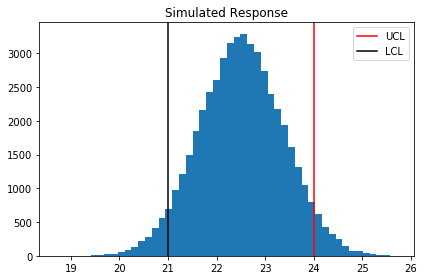

In [21]:
# Print Statistics
pct_below_lcl = len(sim_response[sim_response < lcl])/len(sim_response)
pct_above_ucl = len(sim_response[sim_response > ucl])/len(sim_response)
print('Simulated Response Mean: {:.2f}, StdDev: {:.2f}'.format(sim_response.mean(), sim_response_std))
print('Below LCL({}): {:.2f}%, Above UCL({}): {:.2f}%'.format(lcl, pct_below_lcl*100, ucl, pct_above_ucl*100))

# Check the distribution of the simulated response
plt.hist(sim_response, bins=50)
plt.axvline(ucl, color = 'r', label = 'UCL')
plt.axvline(lcl, color = 'k', label = 'LCL')
plt.legend()
plt.title('Simulated Response')
plt.tight_layout();

In [22]:
# Calculate the required StdDev of Simulated Response
# UCL-LCL is the required 6*Sigma or 6*StdDev value. So we calculate the required stddev as (ucl-lcl)/6
req_std = (ucl-lcl)/6
req_std

0.5

In [23]:
# Create a range of stddev dividers to find the reduction needed in feature stddev to meet the customer specs of response stddev
std_div_range = np.linspace(1,2,11)
std_div_range

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [24]:
# Find the least reduction needed in feature stddev to meet the customer specs of response stddev
for std_div in std_div_range:
    sim_response, sim_response_std = sim_response_gen(X_train, y_train, feature_cols, coef_rescale, RMSE, N_runs, std_div)
    print('std_div: {:.2f}, sim_response_std: {:.2f}'.format(std_div, sim_response_std))
    if sim_response_std < req_std:
        req_std_div = std_div
        opt_sim_response = sim_response
        opt_sim_response_std = sim_response_std
        break

std_div: 1.00, sim_response_std: 0.87
std_div: 1.10, sim_response_std: 0.79
std_div: 1.20, sim_response_std: 0.73
std_div: 1.30, sim_response_std: 0.67
std_div: 1.40, sim_response_std: 0.63
std_div: 1.50, sim_response_std: 0.59
std_div: 1.60, sim_response_std: 0.55
std_div: 1.70, sim_response_std: 0.52
std_div: 1.80, sim_response_std: 0.49


StdDev of features need to divide by: 1.80 to get Final Simulated Response StdDev: 0.49
Optimized Simulated Response Mean: 22.51, StdDev: 0.49
Below LCL(21): 0.12%, Above UCL(24): 0.12%


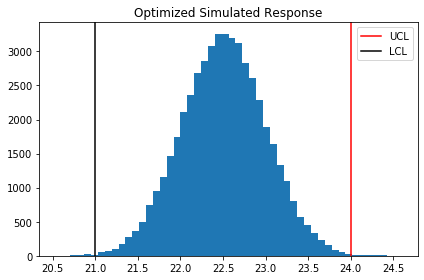

In [25]:
print('StdDev of features need to divide by: {:.2f} to get Final Simulated Response StdDev: {:.2f}'.format(req_std_div,opt_sim_response_std))

# Print Statistics
pct_below_lcl = len(opt_sim_response[opt_sim_response < lcl])/len(opt_sim_response)
pct_above_ucl = len(opt_sim_response[opt_sim_response > ucl])/len(opt_sim_response)
print('Optimized Simulated Response Mean: {:.2f}, StdDev: {:.2f}'.format(opt_sim_response.mean(), opt_sim_response_std))
print('Below LCL({}): {:.2f}%, Above UCL({}): {:.2f}%'.format(lcl, pct_below_lcl*100, ucl, pct_above_ucl*100))

# Check the distribution of the optimized simulated response
plt.hist(opt_sim_response, bins=50)
plt.axvline(ucl, color = 'r', label = 'UCL')
plt.axvline(lcl, color = 'k', label = 'LCL')
plt.legend()
plt.title('Optimized Simulated Response')
plt.tight_layout();

In [26]:
current_std = X_train[feature_cols].std()
desired_std = current_std/req_std_div
feature_stddevs = pd.DataFrame(np.c_[current_std, desired_std], columns=['Current_Std', 'Desired_Std'], index=feature_cols)
print('The current and desired stddevs of the features are: \n\n{}'.format(feature_stddevs))

The current and desired stddevs of the features are: 

            Current_Std  Desired_Std
feature_1      0.002009     0.001116
feature_2      0.001987     0.001104
feature_3      4.968360     2.760200
feature_4      5.060973     2.811652
feature_61     4.053497     2.251943


# Conclusion

- To achieve the customer specs of 21mpg to 24mpg in the response variable, the variation in feature_1, feature_2, feature_3, feature_4 and feature_61 need to be reduced from their current values to the desired values.
- Practically this would be achieved by tigheting the tolerances in the SPC systems for these features and let automated Run to Run controllers gradually tighten the disctribution over time.
- As a Data Scientist, these results are presented to the Engineering team. The Engineering team then proceeds to tighten the tolerances in the SPC systems.